#Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
import warnings
warnings.filterwarnings("ignore")

#Loading the Dataset

In [2]:
df = pd.read_csv('/content/mcdonalds.csv')

In [3]:
print(df.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [4]:
df.shape

(1453, 15)

In [5]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [6]:
MD_x = df.iloc[:, 0:11].values
MD_x = (MD_x == "Yes").astype(int)

In [8]:
pca = PCA()
MD_pca = pca.fit(MD_x)

In [9]:
# Get the standard deviations (square root of the eigenvalues)
standard_deviations = np.sqrt(pca.explained_variance_)

# Proportion of variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative proportion of variance explained
cumulative_variance = np.cumsum(explained_variance_ratio)

# Print the summary
print("Standard Deviation:", np.round(standard_deviations, 2))
print("Proportion of Variance:", np.round(explained_variance_ratio, 2))
print("Cumulative Proportion:", np.round(cumulative_variance, 2))

Standard Deviation: [0.76 0.61 0.5  0.4  0.34 0.31 0.29 0.28 0.27 0.25 0.24]
Proportion of Variance: [0.3  0.19 0.13 0.08 0.06 0.05 0.04 0.04 0.04 0.03 0.03]
Cumulative Proportion: [0.3  0.49 0.63 0.71 0.77 0.82 0.86 0.9  0.94 0.97 1.  ]


In [10]:
print("\nStandard Deviations (1, ..., p=11):")
print(np.round(standard_deviations, 1))
print()
# Get the principal components (loadings)
components = pca.components_

# Print the components and explained variance, rounded to 1 decimal place
print(np.round(components, 1))


Standard Deviations (1, ..., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]

[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]


#Plot the PCA Result

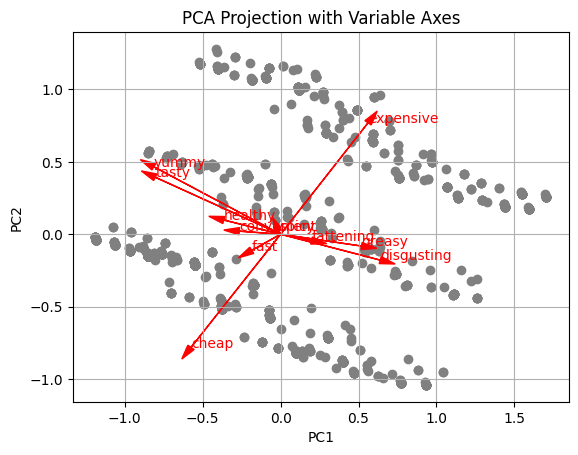

In [14]:
# Predict (transform) the data onto the principal component space
MD_pca_scores = pca.transform(MD_x)

# Plot the PCA scores
plt.scatter(MD_pca_scores[:, 0], MD_pca_scores[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Adding projection axes (original variables) to the plot
for i, (comp1, comp2) in enumerate(pca.components_[:2].T):
    plt.arrow(0, 0, comp1 * max(MD_pca_scores[:, 0]), comp2 * max(MD_pca_scores[:, 1]),
              color='red', head_width=0.05, head_length=0.1)
    plt.text(comp1 * max(MD_pca_scores[:, 0]), comp2 * max(MD_pca_scores[:, 1]),
             x[i], color='red')

plt.grid(True)
plt.title('PCA Projection with Variable Axes')
plt.show()

#Extracting Segments using k-means

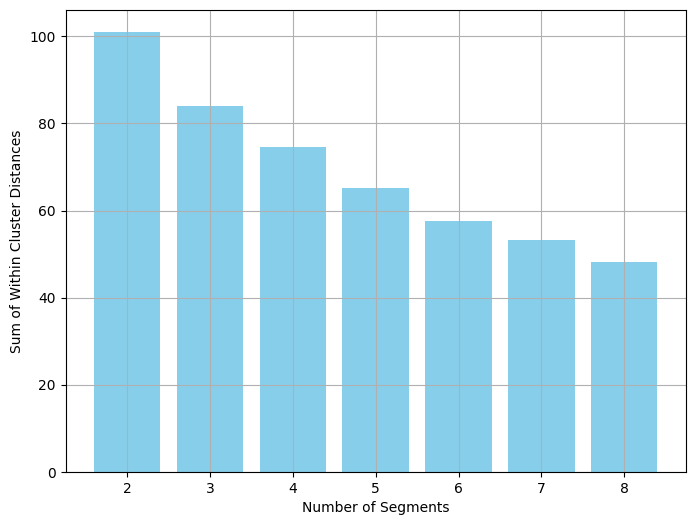

In [50]:
# StepFlexclust equivalent: Trying different k values and choosing the best
best_kmeans = None
best_inertia = np.inf

for n_clusters in range(2, 9):
    kmeans_list = []
    for _ in range(10):
        kmeans = KMeans(n_clusters=n_clusters, random_state=1234)
        kmeans.fit(MD_x)
        kmeans_list.append(kmeans)

    # Choose the one with the lowest inertia (sum of squared distances)
    avg_inertia = np.mean([k.inertia_ for k in kmeans_list])
    if avg_inertia < best_inertia:
        best_inertia = avg_inertia
        best_kmeans = kmeans_list[0]  # Assuming you want the first one

# Relabel equivalent: Ensuring consistent labeling across k-means runs
# scikit-learn doesn't have a built-in 'relabel' function, so this part might require custom implementation
labels = best_kmeans.labels_
# Assuming you have stored the inertias or another relevant metric for each number of clusters in a list
num_clusters = list(range(2, 9))
inertias = []  # Replace with your list of inertia values for each k

# Populate the inertias list by running k-means for each number of clusters
for n_clusters in num_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=1234)
    kmeans.fit(MD_x)
    inertias.append(kmeans.inertia_)

# Plotting the inertia against the number of clusters
plt.figure(figsize=(8, 6))
plt.bar(num_clusters, inertias, color='skyblue')
plt.xlabel('Number of Segments')
plt.ylabel('Sum of Within Cluster Distances')
plt.grid(True)
plt.show()

In [16]:
# Set the seed for reproducibility
np.random.seed(1234)
# Parameters
n_clusters_range = range(2, 9)
nrep = 10
nboot = 100

# Initialize dictionary to store ARI values for each k
ari_scores = {k: [] for k in n_clusters_range}

# Bootstrapping process
for n_clusters in n_clusters_range:
    for _ in range(nboot):
        # Resample the data with replacement
        MD_x_bootstrap = resample(MD_x, replace=True, n_samples=len(MD_x), random_state=np.random.randint(1e6))

        # Perform clustering on the original and bootstrapped datasets
        kmeans = KMeans(n_clusters=n_clusters, random_state=1234)
        kmeans.fit(MD_x)
        labels_original = kmeans.labels_

        kmeans.fit(MD_x_bootstrap)
        labels_bootstrap = kmeans.labels_

        # Calculate Adjusted Rand Index (ARI)
        ari = adjusted_rand_score(labels_original, labels_bootstrap)
        ari_scores[n_clusters].append(ari)

# Preparing data for boxplot
ari_data = [ari_scores[k] for k in n_clusters_range]


#Global Stability of k means segmentation solutions

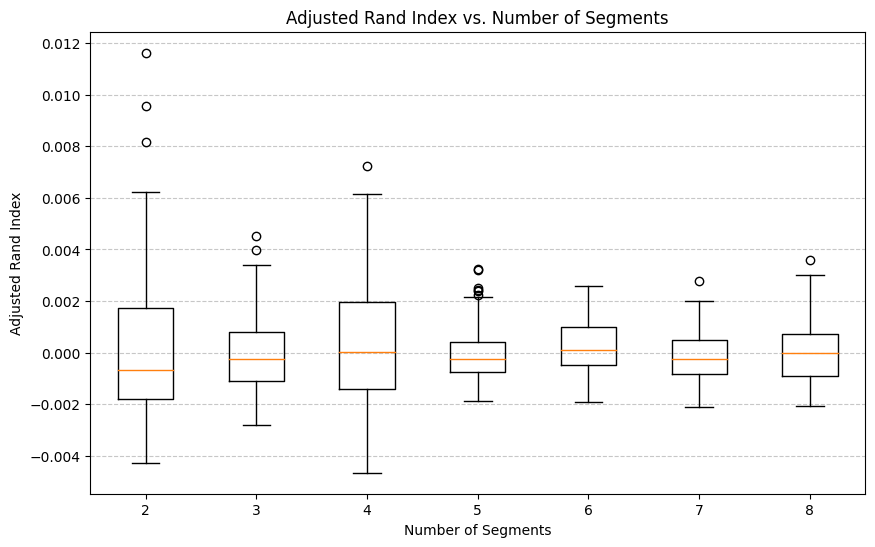

In [17]:
# Creating a box and whisker plot
plt.figure(figsize=(10, 6))
plt.boxplot(ari_data, labels=n_clusters_range)
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Adjusted Rand Index vs. Number of Segments')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


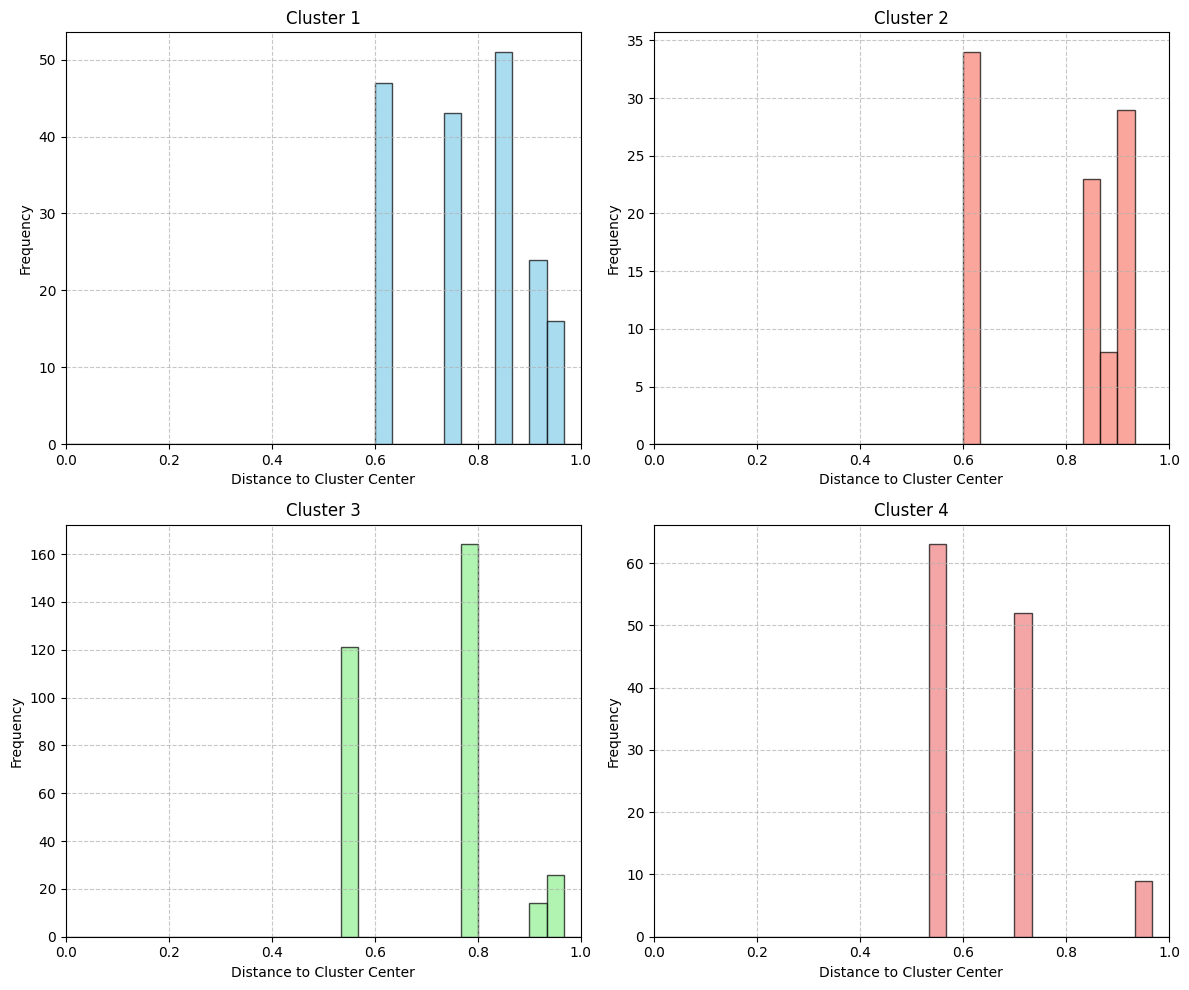

In [22]:
# Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(MD_x)

# Retrieve the labels assigned to each point
labels = kmeans.labels_

# Create subplots for each cluster
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral']

for i in range(4):
    # Extract the points belonging to the current cluster
    cluster_points = MD_x[labels == i]

    # Calculate distances of these points to their cluster center
    distances = np.min(kmeans.transform(cluster_points), axis=1)

    # Plot the histogram for this cluster in the corresponding subplot
    axes[i].hist(distances, bins=30, range=(0, 1), color=colors[i], edgecolor='black', alpha=0.7)
    axes[i].set_xlim(0, 1)
    axes[i].set_xlabel('Distance to Cluster Center')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Cluster {i+1}')
    axes[i].grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

#Segment level stability within solutions

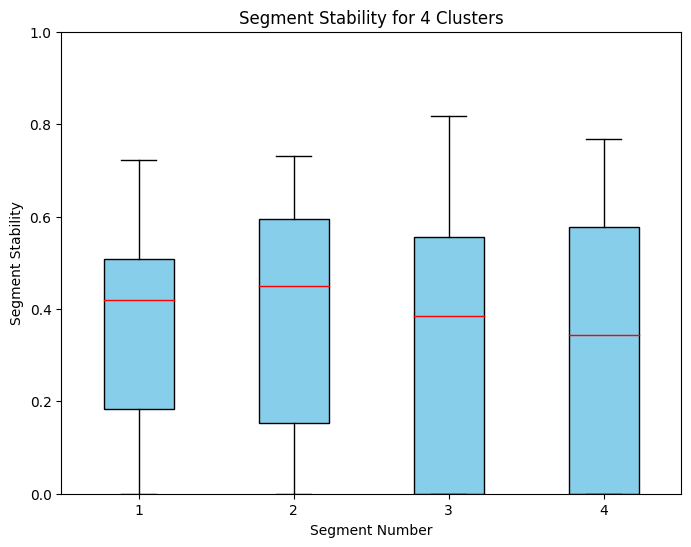

In [25]:
from sklearn.metrics import pairwise_distances_argmin_min

# Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(MD_x)

# Obtain the original cluster assignments
MD_k4_labels = kmeans.labels_

# Function to compute stability scores
def compute_stability_scores(data, original_labels, n_clusters=4, n_bootstraps=100):
    stability_scores = [[] for _ in range(n_clusters)]

    for _ in range(n_bootstraps):
        # Bootstrap resampling
        resampled_data = resample(data)

        # Re-cluster the resampled data
        kmeans_resample = KMeans(n_clusters=n_clusters, random_state=1234)
        kmeans_resample.fit(resampled_data)

        # Compare resampled cluster centers with original cluster centers
        _, min_distances = pairwise_distances_argmin_min(kmeans_resample.cluster_centers_, kmeans.cluster_centers_)

        # Normalize and store the stability scores for each cluster
        for i in range(n_clusters):
            stability_score = 1 - (min_distances[i] / min_distances.max())
            stability_scores[i].append(stability_score)

    return stability_scores

# Compute segment stability scores
MD_r4_stability_scores = compute_stability_scores(MD_x, MD_k4_labels)

# Plot the box plot of segment stability scores
plt.figure(figsize=(8, 6))
plt.boxplot(MD_r4_stability_scores, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='red'))

plt.ylim(0, 1)
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.title('Segment Stability for 4 Clusters')
plt.show()

In [28]:
from sklearn.mixture import GaussianMixture
MD_x = np.random.binomial(1, 0.5, (100, 5))
def compute_aic(n_samples, log_likelihood, n_params):
    return 2 * n_params - 2 * log_likelihood

def compute_bic(n_samples, log_likelihood, n_params):
    return np.log(n_samples) * n_params - 2 * log_likelihood

results = []
n_clusters_range = range(2, 9)

for k in n_clusters_range:
    gmm = GaussianMixture(n_components=k, covariance_type='diag', random_state=1234)
    gmm.fit(MD_x)
    log_likelihood = gmm.score(MD_x) * MD_x.shape[0]
    n_params = gmm.n_components * (2 * MD_x.shape[1] - 1)
    aic = compute_aic(MD_x.shape[0], log_likelihood, n_params)
    bic = compute_bic(MD_x.shape[0], log_likelihood, n_params)
    labels = gmm.predict(MD_x)
    cluster_probas = gmm.predict_proba(MD_x)

    # Calculate ICL using a more appropriate method
    icl = bic + np.sum(cluster_probas * np.log(cluster_probas))

    results.append({
        'k': k,
        'logLik': log_likelihood,
        'AIC': aic,
        'BIC': bic,
        'ICL': icl
    })
results_df = pd.DataFrame(results)

print(results_df)

   k       logLik          AIC          BIC  ICL
0  2   242.109236  -448.218473  -401.325409  NaN
1  3   333.994893  -613.989786  -543.650191  NaN
2  4   743.891955 -1415.783910 -1321.997783  NaN
3  5   921.537897 -1753.075793 -1635.843135  NaN
4  6  1083.453142 -2058.906283 -1918.227093  NaN
5  7  1226.293632 -2326.587264 -2162.461543  NaN
6  8  1202.171788 -2260.343576 -2072.771323  NaN


In [29]:

results_df = pd.DataFrame({
    'k': [2, 3, 4, 5, 6, 7, 8],  # Number of clusters
    'AIC': [15267.70, 14693.07, 14316.29, 14140.41, 14054.22, 13966.38, 13935.28],
    'BIC': [15389.17, 14877.92, 14564.52, 14452.01, 14429.20, 14404.73, 14437.01],
    'ICL': [15522.10, 15077.96, 14835.95, 14806.54, 14810.65, 14800.16, 14908.52]
})

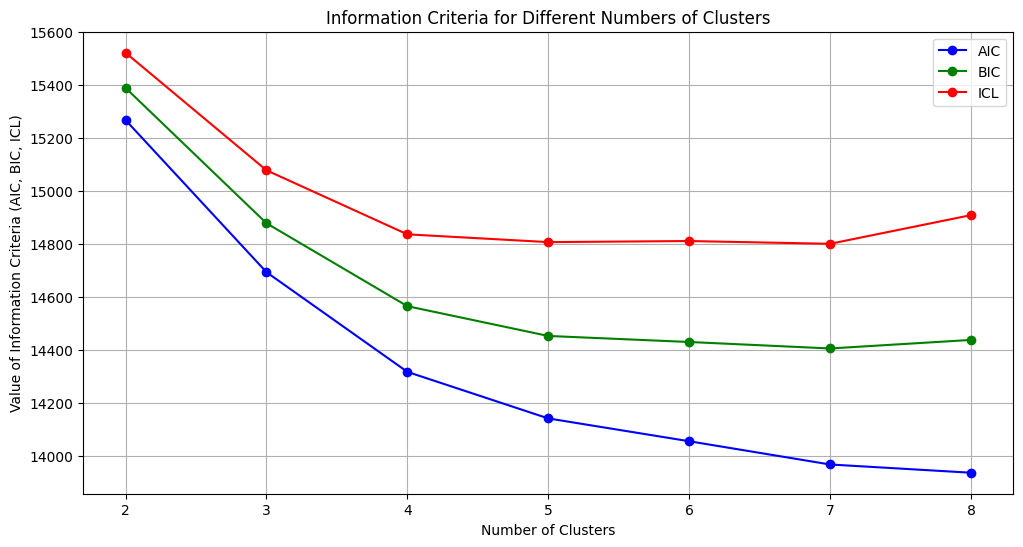

In [30]:

plt.figure(figsize=(12, 6))
plt.plot(results_df['k'], results_df['AIC'], marker='o', linestyle='-', color='b', label='AIC')
plt.plot(results_df['k'], results_df['BIC'], marker='o', linestyle='-', color='g', label='BIC')
plt.plot(results_df['k'], results_df['ICL'], marker='o', linestyle='-', color='r', label='ICL')

plt.xlabel('Number of Clusters')
plt.ylabel('Value of Information Criteria (AIC, BIC, ICL)')
plt.title('Information Criteria for Different Numbers of Clusters')
plt.legend()
plt.grid(True)
plt.xticks(results_df['k'])  # Set x-ticks to be exactly the number of clusters
plt.show()

In [31]:
# Create a frequency table
like_counts = df['Like'].value_counts()

# Reverse the order of the frequency table
reversed_like_counts = like_counts.iloc[::-1]

# Display the reversed frequency table
print(reversed_like_counts)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [46]:
# Create a copy of the DataFrame to avoid modifying the original
df_numeric = df.copy()

# Convert 'Like' column to numeric values
df_numeric['Like'] = df_numeric['Like'].replace({'I hate it!-5': -5, 'I love it!+5': 5})

# Convert 'Like' to numeric values and create 'Like.n' by subtracting from 6
df_numeric['Like.n'] = 6 - pd.to_numeric(df_numeric['Like'])

# Create a frequency table of 'Like.n'
like_n_counts = df_numeric['Like.n'].value_counts()

# Display the frequency table
print(like_n_counts)


Like.n
3     229
4     187
6     169
2     160
5     152
11    152
1     143
9      73
10     71
8      59
7      58
Name: count, dtype: int64


In [36]:
# Create the formula string
independent_vars = ' + '.join(df.columns[:11])  # Select the first 11 columns
formula = f"Like.n ~ {independent_vars}"

# Display the formula
print(formula)

Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting
